# Supernovae measurements to constrain cosmological parameters

In this exercise you will follow some steps of the paper written by Riess et al. about the measurements of Supernovae and their corresponding distance (modulus), which they used to infer cosmological parameters. You will read in the data from two .csv files, have a look at them and then quickly go about fitting different models to the observed data to infer e.g. the dark energy component of the universe. Riess was awarded a shared nobel prize for these findings, since this was the first hard proof of a significant dark energy density.

You can read the abstract below or have a look at the full paper here: https://iopscience.iop.org/article/10.1086/300499/pdf

![Abstract of the paper "OBSERVATIONAL EVIDENCE FROM SUPERNOVAE FOR AN ACCELERATING UNIVERSE AND A COSMOLOGICAL CONSTANT" by Riess et al.](Riess-abstract-full.png "Riess et al. Abstract")

In [1]:
# start by importing the relevant libraries

from astropy.cosmology import Planck18 as planck
from astropy.cosmology import WMAP5 as wmap

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import FlatwCDM
from astropy.cosmology import LambdaCDM
import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt 

In [2]:
# We can quickly check the cosmological parameters by simply printing the 'cosmology'
print(planck)
print(wmap)
# one drawback: no errors are built-in

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)
FlatLambdaCDM(name="WMAP5", H0=70.2 km / (Mpc s), Om0=0.277, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0459)


### Task 0.0: Read the data

First, read in the data from the SN_data.csv and Snapshot.csv file. Many libraries can do this, astropy is one of them. When using your favorite IDE you can see two neat functions when simply typing the table name followed by ``.show`` in a code cell. Printing a table is possible as well, in a notebook you can also just show add write the name at the end of the code cell, which will be formatted differently than printing.

In [3]:
# One of the easiest ways to read in the files is to simply call Table.read("filename")

mlcs = Table.read("MLCS.csv")
snapshot = Table.read("Snapshot.csv")

In [4]:
# this will show the table in a browser
mlcs.show_in_browser()

In [5]:
# this will display the table in the notebook directly
snapshot.show_in_notebook()

idx,SN,Z,mu_0,mu_0_err
0,1995ao,0.3,40.74,0.6
1,1995ap,0.23,40.33,0.46
2,1996R,0.16,39.08,0.4
3,1996T,0.24,40.68,0.43
4,1997Ia,0.17,39.95,0.24
5,1997apa,0.83,43.67,0.35


In [6]:
# printing a tbale is possible as well, but the formatting is less helfpul, will quickly omit columns/rows and not show var-types
print(mlcs)

  SN    Z   m_B_max m_B_max_err m_V_max ... mu_0(TF) mu_0(TF)_err  mu_0 mu_0_err
------ ---- ------- ----------- ------- ... -------- ------------ ----- --------
 1996E 0.43   22.72         0.1    22.6 ...    42.03         0.22 41.74     0.28
 1996H 0.62   23.31        0.06   23.57 ...    43.01         0.15 42.98     0.17
 19961 0.57   23.42        0.08   23.61 ...    42.83         0.21 42.76     0.19
 1996J  0.3   22.28        0.05   22.06 ...    40.99         0.25 41.38     0.24
 1996K 0.38    22.8        0.05   22.86 ...    42.21         0.18 41.63      0.2
 1996U 0.43   22.77        0.05   22.96 ...    42.34         0.17 42.55     0.25
1997ce 0.44   22.83        0.05   22.92 ...    42.26         0.16 41.95     0.17
1997cj  0.5   23.29        0.05   23.29 ...     42.7         0.16  42.4     0.17
1997ck 0.97   24.78        0.16      -- ...     44.3         0.19 44.39      0.3
 1995K 0.48   22.92        0.08   23.07 ...    42.49         0.17 42.45     0.17


In [7]:
# simply outputting in a notebook cell will format it more like a table, but not have the functionality of ``.show_in_notebook()``
mlcs

SN,Z,m_B_max,m_B_max_err,m_V_max,m_V_max_err,mu_0(TF),mu_0(TF)_err,mu_0,mu_0_err
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64
1996E,0.43,22.72,0.1,22.6,0.12,42.03,0.22,41.74,0.28
1996H,0.62,23.31,0.06,23.57,0.06,43.01,0.15,42.98,0.17
19961,0.57,23.42,0.08,23.61,0.08,42.83,0.21,42.76,0.19
1996J,0.3,22.28,0.05,22.06,0.05,40.99,0.25,41.38,0.24
1996K,0.38,22.8,0.05,22.86,0.08,42.21,0.18,41.63,0.2
1996U,0.43,22.77,0.05,22.96,0.11,42.34,0.17,42.55,0.25
1997ce,0.44,22.83,0.05,22.92,0.05,42.26,0.16,41.95,0.17
1997cj,0.5,23.29,0.05,23.29,0.05,42.7,0.16,42.4,0.17
1997ck,0.97,24.78,0.16,--,--,44.3,0.19,44.39,0.3


In [8]:
# it is possible to show certain rows only as well
mlcs[3:5]

SN,Z,m_B_max,m_B_max_err,m_V_max,m_V_max_err,mu_0(TF),mu_0(TF)_err,mu_0,mu_0_err
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64
1996J,0.3,22.28,0.05,22.06,0.05,40.99,0.25,41.38,0.24
1996K,0.38,22.8,0.05,22.86,0.08,42.21,0.18,41.63,0.2


### Task 0.1: Merge the two tables
Merge the two tables into one big ``SN_data`` table.

*Hint:* look at the import section at the top to find a neat function to do this. Of course, there are multiple ways of doing this, also without astropy even (e.g. numpy), so feel free to play around.

In [9]:
# merge the tables
SN_data = vstack([mlcs, snapshot]) # need to pass an array/list into the vstack command

### Task 1: Plot the maximum magnitude against redshift, including the errors in magnitude

It's always good to get a feeling for the data you're working with and a plot helps to visualize the data. If you do a log-plot in the x-axis, you should get the dots to be on a straight line.

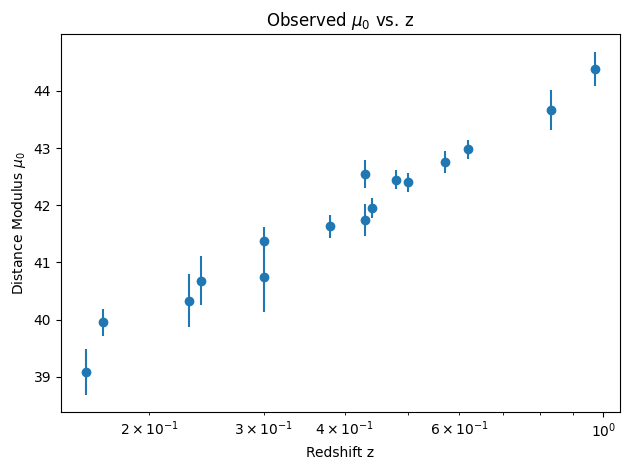

In [10]:
plt.errorbar(x = SN_data["Z"], y = SN_data["mu_0"], yerr = SN_data["mu_0_err"], fmt = "o")
plt.title(r"Observed $\mu_0$ vs. z")
plt.xlabel("Redshift z")
plt.ylabel(r"Distance Modulus $\mu_0$")
plt.xscale("log")
plt.tight_layout()
plt.show()

### Task 2: Add the Planck18 & WMAP5 cosmological relation of $\mu_0$ vs. z to the plot

Plot the distance modulus $\mu_0$ vs. z over a redshift range of 0 to 1, including the calculated values from the cosmological parameters given by Planck18 and WMAP5, as well as the SN data.

In [11]:
# Calculate the luminosity distance using Planck18 cosmology
zs = np.linspace(min(SN_data["Z"]), max(SN_data["Z"]), 100)
planck_distance_modulus = planck.distmod(zs)
wmap_distance_modulus = wmap.distmod(zs)

# errors correlated on parameters?

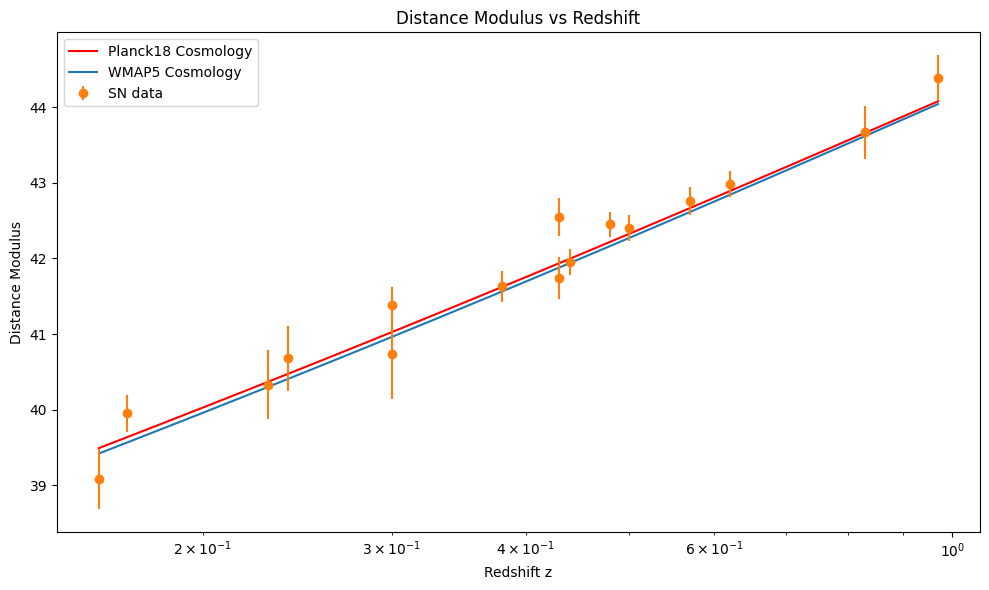

In [12]:
# Plot the luminosity distance vs redshift
plt.figure(figsize=(10, 6))
plt.plot(zs, planck_distance_modulus, 'r-', label='Planck18 Cosmology')
plt.plot(zs, wmap_distance_modulus, label='WMAP5 Cosmology')
plt.errorbar(x = SN_data["Z"], y = SN_data["mu_0"], yerr = SN_data["mu_0_err"], fmt = "o", label = "SN data")
plt.xlabel('Redshift z')
plt.ylabel('Distance Modulus')
plt.title('Distance Modulus vs Redshift')
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()

You may have realized that both models seem like an ok fit to the data, so you can't (at least by eye) distinguish which could be more correct. This wasn't the purpose or big claim from the Riess et. al paper, instead they were able to show, that some kind of dark energy ("the lambda") is required to explain the observed SN data.

Today, 25 years later, we are in the "era of precision cosmology", where it *is possible* to distinguish between the two models above. Measurements from the CMB (Cosmic Microwave Background) disagree however now to significant levels with Supernovae measurements. This is what is known as **Hubble tension**, since it is unclear, why the deviation arises and how to resolve it. The current CMB (often dubbed Planck, since this was the instrument's name) & SN (e.g. Sh0es) measurements are:
- Planck: $H_0 = 67.4\pm0.5$ km/s/Mpc, $\Omega_m = 0.315\pm0.007$, $\Omega_k = 0.001\pm0.002$, $\omega_0 = -1.03\pm0.03$ (Planck18)
- SH0ES: $H_0 = 73.2\pm1.3$ km/s/Mpc

There are many other (types of) measurements of $H_0$ (and the other parameters, too, of course), with a general tendency to be closer to the Planck/CMB value, but no conclusive explanation has been found for why the Supernovae result should differ.

### Task 3: Try multiple different combinations of cosmological parameters & compare

This task is to get a feeling, which of the cosmological parameters are related and how they change depending on each other. Start by assuming a FlatLambdaCDM model and simply try out yourself. Ask yourself, what values of ``\Omega_0`` and ``H_0`` do not make any sense at all and see what happens.

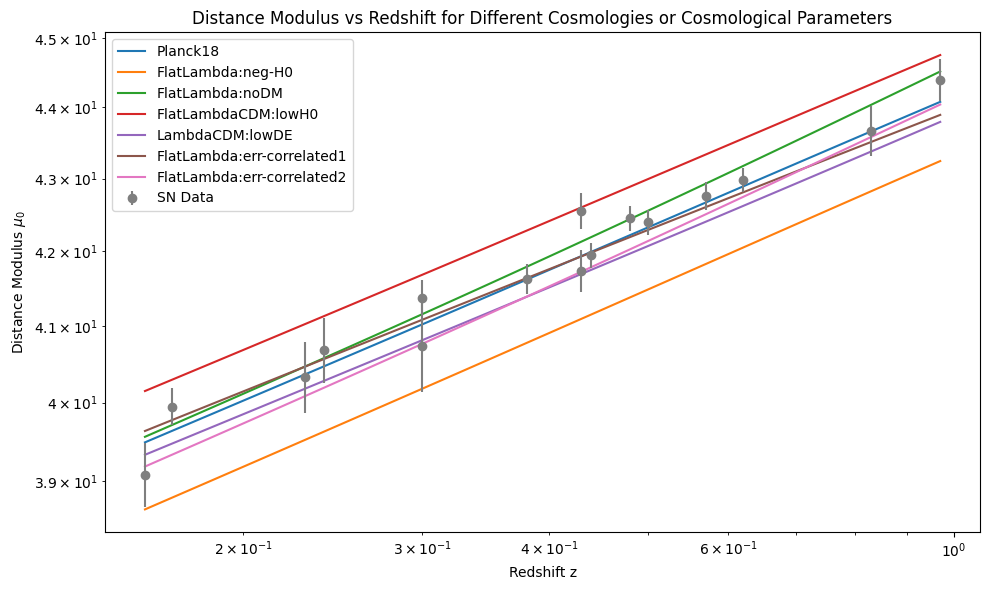

In [35]:
# Define different cosmologies
cosmologies = {
    'Planck18': planck, # not plotting WMAP here because quite similar to planck
    'FlatLambda:neg-H0': FlatLambdaCDM(H0=-100, Om0=0.30), # negative Hubble parameter! -> takes absolute value and therefore rather high...
    'FlatLambda:noDM': FlatLambdaCDM(H0=67.66, Om0=0.049), # no dark matter (i.e. Om0 = Ob0)
    'FlatLambdaCDM:lowH0': FlatLambdaCDM(H0=50, Om0=0.30),
    'LambdaCDM:lowDE': LambdaCDM(H0 = 70, Om0 = 0.3, Ode0 = 0.1),
    'FlatLambda:err-correlated1': FlatLambdaCDM(H0=60, Om0=0.8),
    'FlatLambda:err-correlated2': FlatLambdaCDM(H0=80, Om0=0.1),
}

# Calculate luminosity distances for each cosmology
distmods_cosmologies = {}
for name, cos in cosmologies.items():
    distmods_cosmologies[name] = cos.distmod(zs)

# Plot the luminosity distance vs redshift for each cosmology
plt.figure(figsize=(10, 6))
for name, mu in distmods_cosmologies.items():
    plt.plot(zs, mu, label=name)
plt.errorbar(SN_data['Z'], SN_data['mu_0'], yerr = SN_data['mu_0_err'], fmt = 'o', label='SN Data')
plt.xlabel('Redshift z')
plt.ylabel(r'Distance Modulus $\mu_0$')
plt.title('Distance Modulus vs Redshift for Different Cosmologies or Cosmological Parameters')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()

From the above plot, it becomes clear that even by eye we can exclude the $H_0$-parameter being either much higher or lower than compared to the given values. It is also at least plausible, that a low Dark Energy component seems incompatible, as well as a universe with no DM.

### Task 4: What is the dark energy fraction in our universe given the SN data?

We want to find out what parameters we can constrain from the given data. For this, we suggest the following: 
- start with trying to constrain only the matter density $\Omega_m$, by imposing no curvature in your cosmological model and w=-1. Which model is that? Use it directly from astropy and set the Hubble parameter to 65.2 (that's the inferred parameter from Riess et. al)!
- try to write the corresponding function to be fit and use astropy's built-in function to evaluate the parameter of interest
- fit the function, using e.g. a starting value of $\Omega_m \approx 0.3$. You can restrict this to positive values, since (by the pure existence of you & me) there is *some* matter.
- Redo the above steps trying to constrain at least one more cosmological parameter, e.g. by not imposing $H_0 = 65.2$. 
- If you can, try to constrain all model parameters ($H_{0}, \Omega_m, \Omega_\lambda $) in a (curved) CDM model.


Feel free to play around with some cosmologies!

In [14]:
def distmod_fit_function_fldaCDM(z, Om0):
    cosmology = FlatLambdaCDM(H0=65.2, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_fldaCDM_H0(z, H0, Om0):
    cosmology = FlatLambdaCDM(H0=H0, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_ldaCDM(z, Om0, Ode0):
    cosmology = LambdaCDM(H0=65.2, Om0=Om0, Ode0 = Ode0)
    return cosmology.distmod(z).value

def distmod_fit_function_ldaCDM_H0(z, H0, Om0, Ode0):
    cosmology = LambdaCDM(H0=H0, Om0=Om0, Ode0 = Ode0)
    return cosmology.distmod(z).value

def distmod_fit_function_flatwCDM(z, w0, Om0):
    cosmology = FlatwCDM(H0=65.2, w0 = w0, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_flatwCDM_H0(z, H0, w0, Om0):
    cosmology = FlatwCDM(H0=H0, w0 = w0, Om0=Om0)
    return cosmology.distmod(z).value

In [15]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [16]:
least_squares_fldaCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_fldaCDM)
least_squares_fldaCDM_HO = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_fldaCDM_H0)
least_squares_ldaCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_ldaCDM)
least_squares_ldaCDM_H0 = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_ldaCDM_H0)
least_squares_fwCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_flatwCDM)
least_squares_fwCDM_H0 = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_flatwCDM_H0)

m_fldaCDM = Minuit(least_squares_fldaCDM, Om0=0.3)  # starting values for Om0
m_fldaCDM_H0 = Minuit(least_squares_fldaCDM_HO, H0 = 65, Om0=0.3)  # starting values for Om0 & H0
m_ldaCDM = Minuit(least_squares_ldaCDM, Om0=0.3, Ode0=0.7)  # starting values for Om0 and Ode0
m_ldaCDM_H0 = Minuit(least_squares_ldaCDM_H0, H0 = 65, Om0=0.3, Ode0=0.7)  # starting values for Om0 and Ode0 and H0
m_fwCDM = Minuit(least_squares_fwCDM, w0 = -1, Om0=0.3)  # starting values for Om0 and Ode0 and H0
m_fwCDM_H0 = Minuit(least_squares_fwCDM_H0, H0 = 65, w0 = -1, Om0=0.3)  # starting values for Om0 and Ode0 and H0

In [17]:
# try scipy minimizer for cross-check
# maybe try to set boundaries in iminuit (compare to Riess. et. al paper)

Beginning with the FlatLamdbaCDM model, where only the matter density is being fitted as $H_0$ is set to 65.2.

In [ ]:
m_fldaCDM.limits = [(0, None)] # impose limit that the matter density is not negative
m_fldaCDM.migrad()  # finds minimum of least_squares function
m_fldaCDM.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.49 (χ²/ndof = 0.8)      │              Nfcn = 55               │
│ EDM = 2.25e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Om0  │   0.26    │   0.08    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────┐
│     │     Om0 │
├─────┼─────────┤
│ Om0 │ 0.00576 │
└─────┴─────────┘

Fitting results are fine and we find a compatible matter density parameter of $\Omega_{m,0} = 0.26$. Since this is a flat $\lambda$ CDM model, this implies a dark energy component of $\Omega_{de} = 0.74$.

Next, looking to constrain both the Hubble parameter and dark energy fraction.

In [19]:
m_fldaCDM_H0.limits = [(0, None), (0, None)]
m_fldaCDM_H0.migrad()  # finds minimum of least_squares function
m_fldaCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.47 (χ²/ndof = 0.8)      │              Nfcn = 40               │
│ EDM = 1.25e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    64     │     6     │            │            │    0    │         │       │
│ 1 │ Om0  │   0.29    │   0.26    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────┐
│     │     H0    Om0 │
├─────┼───────────────┤
│  H0 │   35.1  -1.53 │
│ Om0 │  -1.53 0.0728 │
└─────┴───────────────┘

The fitting results are good again, with $H_0 = 64$ km/s/Mpc and $\Omega_{m,0} = 0.29$. However, looking at the errors you may realize these are now much larger and there is a degeneracy in the parameters: a smaller Hubble parameter may be explained (at least in the given redshift range) by a high matter density parameter and vice versa!

Now, the goal is to check whether dark energy is necessary to explain the measured data. In this case, $H_0$ is set to 65.2 km/s/Mpc again.

In [20]:
m_ldaCDM.limits = [(0, None), (0, None)]
m_ldaCDM.migrad()  # finds minimum of least_squares function
m_ldaCDM.hesse()   # accurately computes uncertainties


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.48 (χ²/ndof = 0.8)      │              Nfcn = 54               │
│ EDM = 4.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Om0  │    0.2    │    0.5    │            │            │    0    │         │       │
│ 1 │ Ode0 │    0.7    │    0.7    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────┐
│      │   Om0  Ode0 │
├──────┼─────────────┤
│  Om0 │ 0.432   0.5 │
│ Ode0 │   0.5 0.595 │
└──────┴─────────────┘

This model is now consistent with previous results as well, however errors are quite large again.

In the following, more models (e.g. $\omega$ being varied) are tried out as well, but you will see that the constraining power becomes limited and without further limits on the parameter space, results deviate from our previous findings and are in contrast with current cosmological values.

In [39]:
m_ldaCDM_H0.limits = [(None, None), (0, None), (None, None)]
m_ldaCDM_H0.migrad()  # finds minimum of least_squares function
m_ldaCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.34 (χ²/ndof = 0.9)      │              Nfcn = 642              │
│ EDM = 0.000142 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    62     │     8     │            │            │         │         │       │
│ 1 │ Om0  │    0.0    │    2.4    │            │            │    0    │         │       │
│ 2 │ Ode0 │    0.1    │    1.0    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬──────────────────────┐
│      │     H0    Om0   Ode0 │
├──────┼──────────────────────┤
│   H0 │   63.7  0.129    7.5 │
│  Om0 │  0.129 0.0184  0.036 │
│ Ode0 │    7.5  0.036  0.955 │
└──────┴──────────────────────┘

In [22]:
m_fwCDM.limits = [(None, None), (0, None)]
m_fwCDM.migrad()  # finds minimum of least_squares function
m_fwCDM.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.49 (χ²/ndof = 0.8)      │              Nfcn = 72               │
│ EDM = 3.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ w0   │   -0.9    │    1.3    │            │            │         │         │       │
│ 1 │ Om0  │    0.2    │    0.5    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────┐
│     │    w0   Om0 │
├─────┼─────────────┤
│  w0 │  1.75  -0.9 │
│ Om0 │  -0.9 0.501 │
└─────┴─────────────┘

In [23]:
m_fwCDM_H0.limits = [(None, None), (None, None), (0, None)]
m_fwCDM_H0.migrad()  # finds minimum of least_squares function
m_fwCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.38 (χ²/ndof = 0.9)      │              Nfcn = 224              │
│ EDM = 0.000112 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    63     │     6     │            │            │         │         │       │
│ 1 │ w0   │   -0.53   │   0.32    │            │            │         │         │       │
│ 2 │ Om0  │    0.0    │    2.7    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────┐
│     │     H0     w0    Om0 │
├─────┼──────────────────────┤
│  H0 │   33.7  -1.71  0.030 │
│  w0 │  -1.71  0.102 -0.012 │
│ Om0 │  0.030 -0.012 0.0149 │
└─────┴──────────────────────┘